**Import Necessary Libraries**

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)


**Load The Dataset**

In [17]:
df = pd.read_csv("/content/summer.csv")

In [18]:
#The head() function is used to get the first 5 rows. 
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [19]:
#shape would return (rows, columns)
df.shape

(31165, 9)

In [20]:
#returns all the columns in df
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [21]:
#The info() function is used to print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [22]:
#describe() is used to view some basic statistical details like percentile, mean, std 
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [23]:
#isnull(). sum() returns the number of missing values in the data set
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [24]:
#dropna() function is used to remove rows and columns with Null/NaN values
df.dropna()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [25]:
#value_counts() function return a Series containing counts of unique values
df.value_counts()

Year  City       Sport       Discipline           Athlete                       Country  Gender  Event                          Medal 
2012  London     Badminton   Badminton            ZHAO, Yunlei                  CHN      Women   Doubles                        Gold      2
1980  Moscow     Hockey      Hockey               SINGH, Singh                  IND      Men     Hockey                         Gold      2
2012  London     Wrestling   Wrestling Freestyle  YUMOTO, Shinichi              JPN      Men     Wf 55 KG                       Bronze    1
1960  Rome       Gymnastics  Artistic G.          MURATOVA, Sofiya              URS      Women   Team Competition               Gold      1
                                                  LYUKHINA-ZAMOTAILOVA, Tamara  URS      Women   Floor Exercises                Bronze    1
                                                                                                                                         ..
1992  Barcelona  Hockey  

**1. In how many cities Summer Olympics is held so far?**

In [26]:
len(df['City'].unique())

22

In [27]:
city=pd.DataFrame(df['City'].unique(),columns=['City'])
city

,City
0,Athens
1,Paris
2,St Louis
3,London
4,Stockholm
5,Antwerp
6,Amsterdam
7,Los Angeles
8,Berlin
9,Helsinki


**2. Which sport is having most number of Gold Medals so far? (Top 5)**

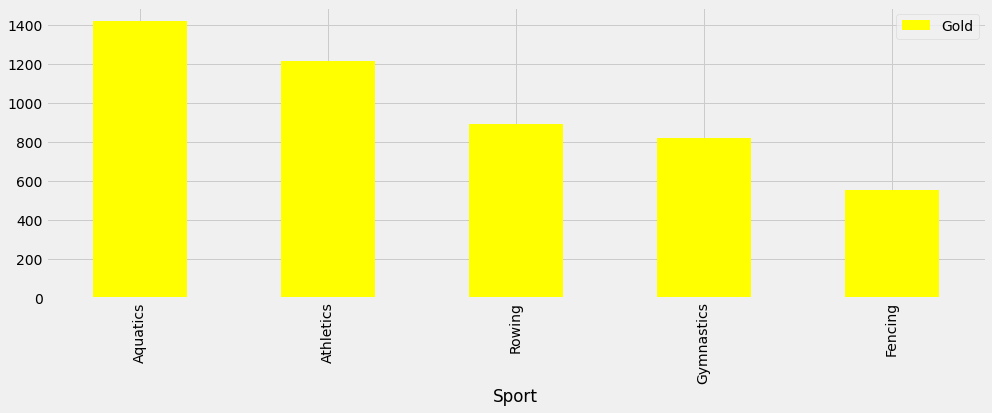

In [34]:
gold= df[df['Medal']=='Gold']
data = []
for sport in gold['Sport'].unique():
  data.append([sport, len(gold[gold['Sport']==sport])])
data = pd.DataFrame(data, columns=['Sport', 'Gold']).sort_values(by='Gold', ascending=False).head()
data.plot(x='Sport', y='Gold', kind='bar', figsize=(15, 5), color='yellow')

In [31]:
data

,Sport,Gold
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


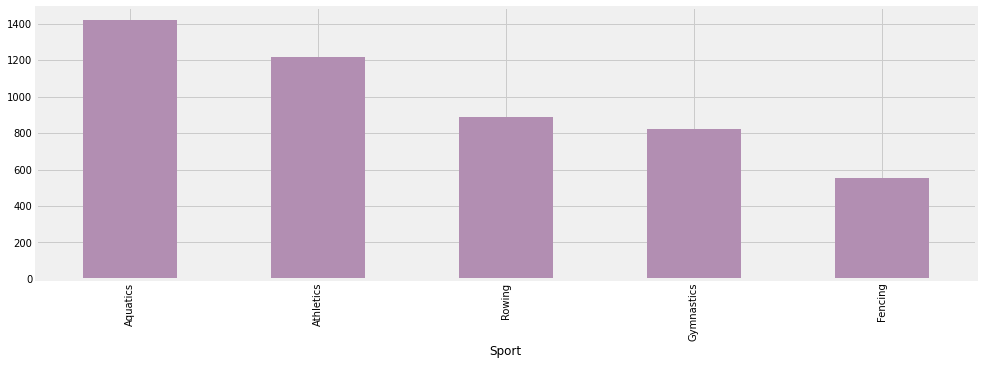

In [ ]:
gold.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(15, 5), color='#b28eb2')

**3. Which sport is having most number of medals so far? (Top 5)**

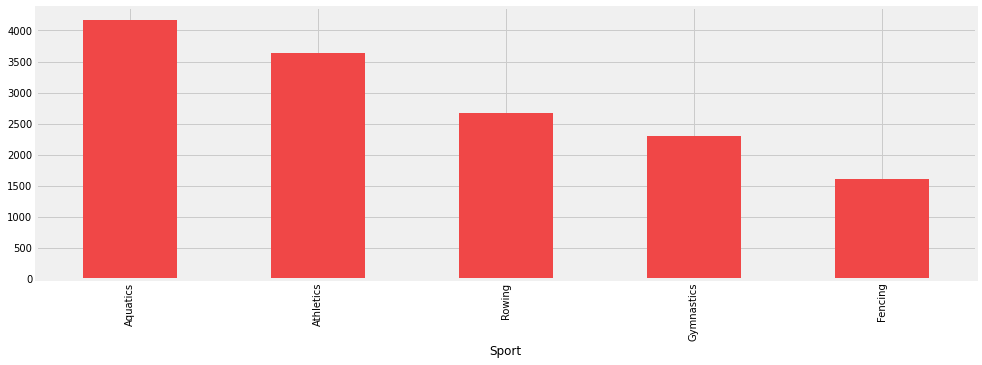

In [ ]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(15, 5), color='#f04747')

**4. Which player has won most number of medals? (Top 5)**

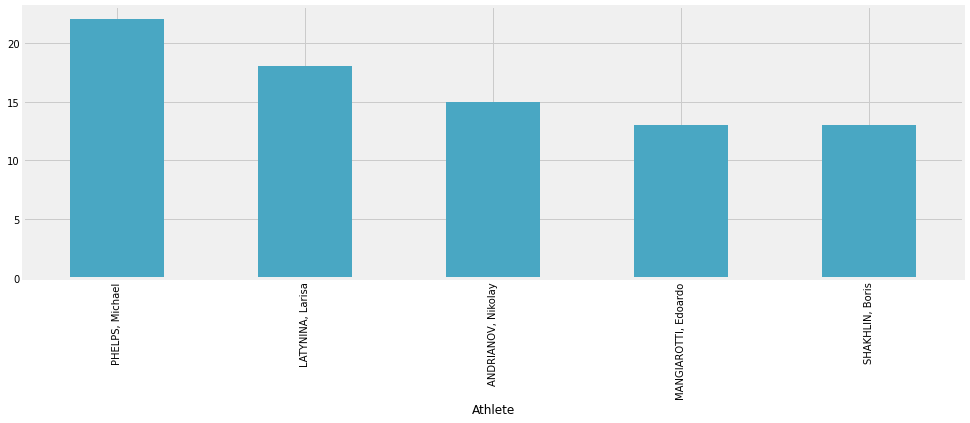

In [ ]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(15, 5), color='#49a7c3')

**5. Which player has won most number Gold Medals of medals? (Top 5)**

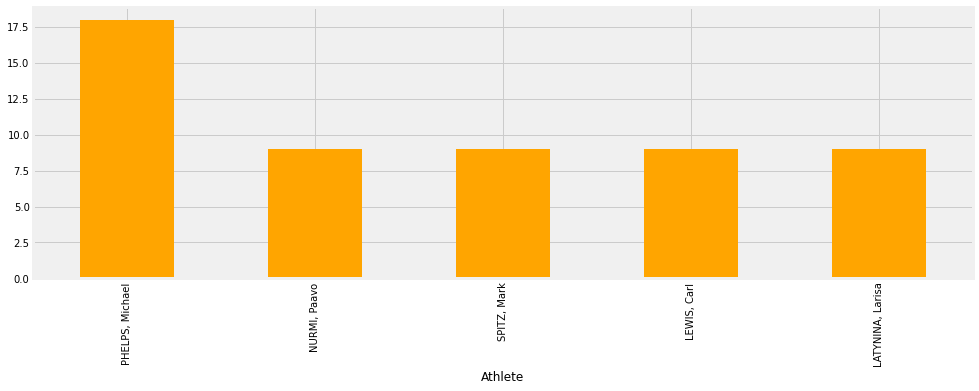

In [ ]:
gold.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head(5).plot.bar(figsize=(15, 5), color='orange')

**6. In which year India won first Gold Medal in Summer Olympics?**

In [ ]:
gold[gold['Country']=='IND']['Year'].min()

1928

**7. Which event is most popular in terms on number of players? (Top 5)**

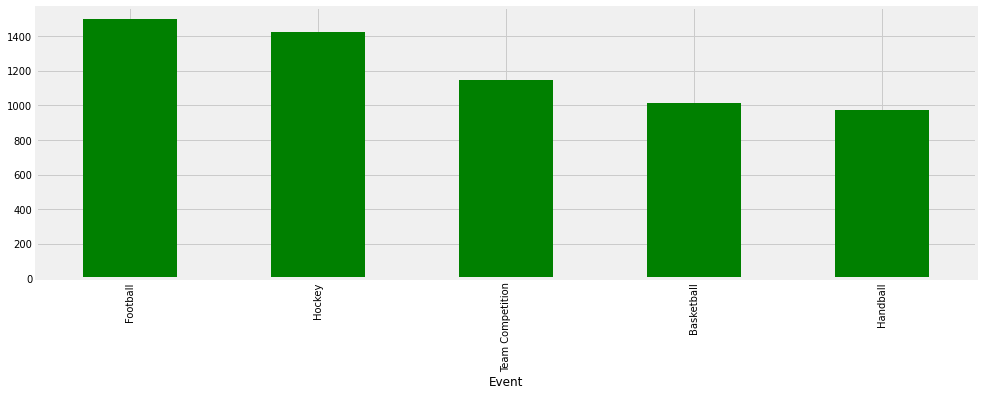

In [ ]:
df.groupby("Event").count()['Athlete'].sort_values(ascending=False).head(5).plot.bar(figsize=(15, 5), color='green')

**8. Which sport is having most female Gold Medalists?**

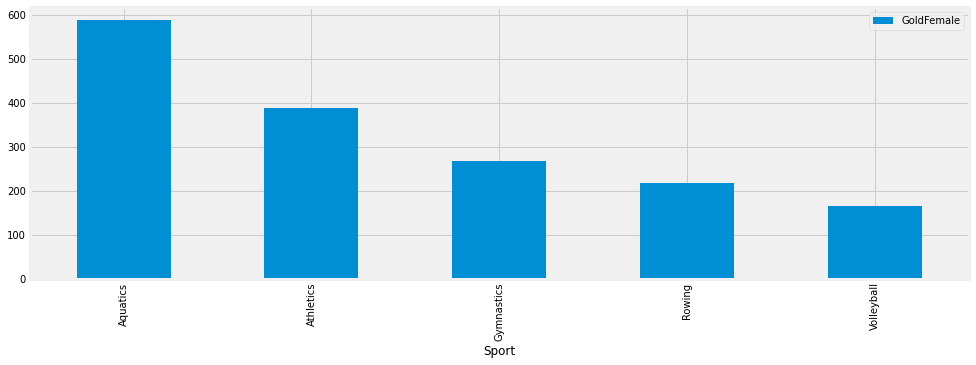

In [ ]:
goldFemale = gold[gold['Gender']=='Women']
data=[]
for sport in goldFemale['Sport'].unique():
  data.append([sport, len(goldFemale[goldFemale['Sport']==sport])])

data= pd.DataFrame(data, columns=['Sport', 'GoldFemale']).sort_values(by='GoldFemale', ascending=False).head()
data.plot(x='Sport' ,y='GoldFemale', kind='bar', figsize=(15, 5))

**Sports and Gender distribution**

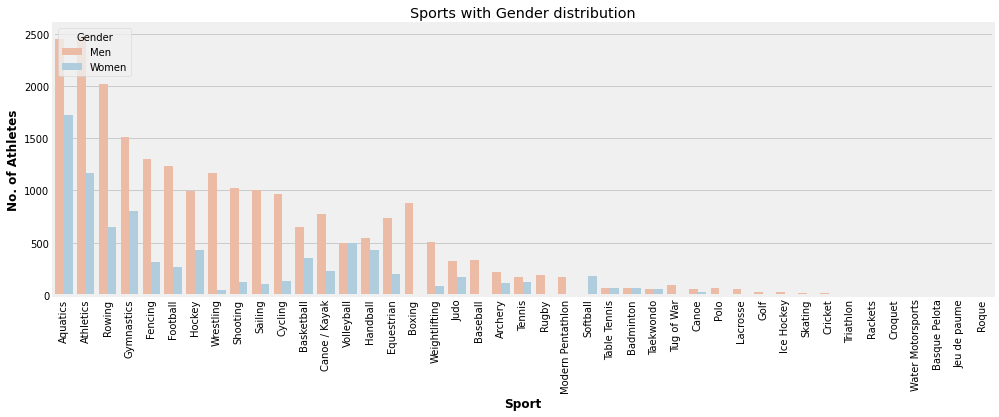

In [ ]:
plt.figure(figsize=(15, 5))
highest_sport = df['Sport'].value_counts().index
sns.countplot(data=df, x='Sport', hue = 'Gender', order=highest_sport, 
              palette=sns.color_palette("RdBu", 2))
plt.xticks(rotation=90)
plt.title('Sports with Gender distribution')
plt.xlabel('Sport', fontweight='bold')
plt.ylabel('No. of Athletes', fontweight='bold');

In [ ]:
gender_group = df.groupby(['Sport','Year', 'Gender']).size().unstack()
gender_group.reset_index(inplace=True)
gender_group.fillna(0, inplace=True)

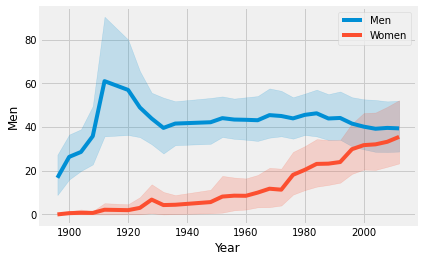

In [ ]:
sns.lineplot(data=gender_group, x="Year", y="Men")
sns.lineplot(data=gender_group, x="Year", y="Women")
plt.legend(["Men", 'Women'])

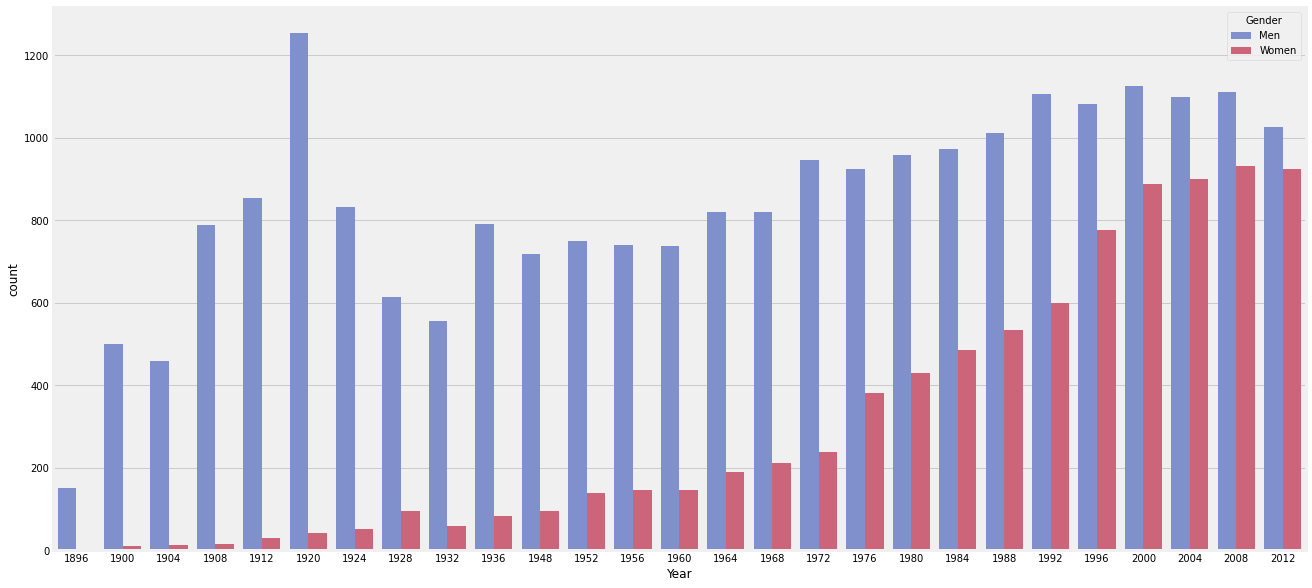

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Year', hue='Gender', palette=['#7289da','#dd546e'])